In [176]:
import matplotlib.pyplot as plt
import os, glob
import pandas as pd

In [310]:
#dirs = ["random", "evidential", "dropout"]
# results_path = "../results/small_mlp"

# dirs = ["evidential", "random", "dropout2"]
#results_path = "../results/zzz/large_mlp"

# dirs = ["random", "evidential/0", "dropout"]
# results_path = "../results/echo_mlp"

# dirs = ["random", "evidential", "dropout"]
# results_path = "../results/20_50/small_mlp"

dirs = ["random", "evidential", "dropout"]
results_path = "../results/echo_free"

colors = ["#d55e00", "#0072b2", "#009e73"]

In [311]:
results_dict = {}
for d in dirs:
    try:
        if "/" in d:
            _d = d.split("/")[-1]
        else:
            _d = d
        results_dict[_d] = pd.concat([
             pd.read_csv(x) for x in glob.glob(os.path.join(results_path, d, "active_train_log_*.csv"))
         ]).drop_duplicates()
    except:
        print(d)

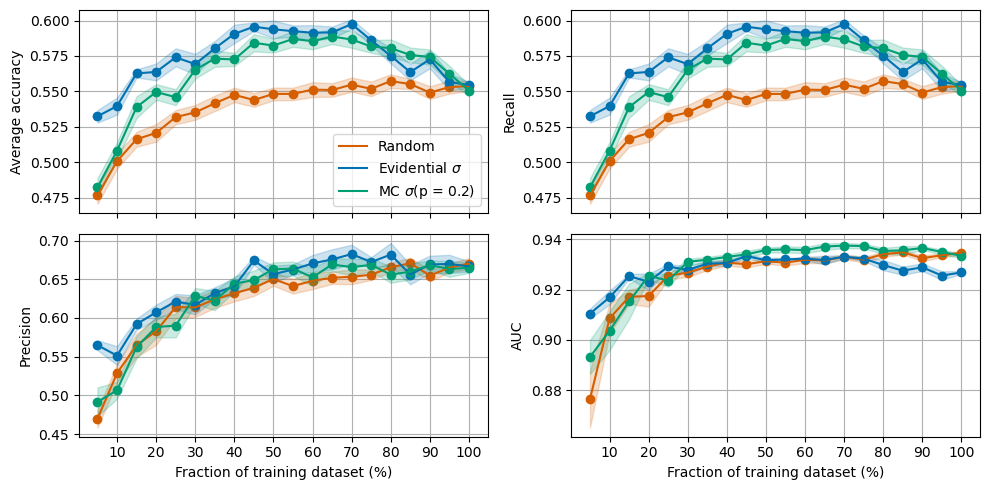

In [312]:
split = "test"
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5), sharex = "col")#, sharey = "row")
alpha = 0.2 

for k, key in enumerate(results_dict.keys()):
    df = results_dict[key].groupby("iteration")
    df_mu, df_std = df.mean(), df.std()
    df_std /=df_std.shape[0] ** (1/2)
    
    axs[0][0].scatter(df_mu.index, df_mu[f"{split}_ave_acc"], c = colors[k], zorder = 2)
    axs[0][0].plot(df_mu.index, df_mu[f"{split}_ave_acc"], c = colors[k], zorder = 2)
    axs[0][0].fill_between(df_mu.index,
                           df_mu[f"{split}_ave_acc"]-df_std[f"{split}_ave_acc"], 
                           df_mu[f"{split}_ave_acc"]+df_std[f"{split}_ave_acc"], color = colors[k], alpha = alpha, zorder = 2)
    axs[0][0].grid(True)
    
    
    axs[1][0].scatter(df_mu.index, df_mu[f"{split}_prec"], c = colors[k], zorder = 2)
    axs[1][0].plot(df_mu.index, df_mu[f"{split}_prec"], c = colors[k], zorder = 2)
    axs[1][0].fill_between(df_mu.index,
                           df_mu[f"{split}_prec"]-df_std[f"{split}_prec"], 
                           df_mu[f"{split}_prec"]+df_std[f"{split}_prec"], color = colors[k], alpha = alpha, zorder = 2)
    axs[1][0].grid(True)
    #axs[2][0].errorbar(df_mu.index, df_mu["{split}_f1"], yerr = df_std["{split}_f1"])
    
    df = results_dict[key].groupby("iteration")
    df_mu, df_std = df.mean(), df.std()
    df_std /=df_std.shape[0] ** (1/2)
    
    axs[0][1].scatter(df_mu.index, df_mu[f"{split}_recall"], c = colors[k], zorder = 2)
    axs[0][1].plot(df_mu.index, df_mu[f"{split}_recall"], c = colors[k], zorder = 2)
    axs[0][1].fill_between(df_mu.index,
                           df_mu[f"{split}_recall"]-df_std[f"{split}_recall"], 
                           df_mu[f"{split}_recall"]+df_std[f"{split}_recall"], color = colors[k], alpha = alpha, zorder = 2)
    axs[0][1].grid(True)
    
    axs[1][1].scatter(df_mu.index, df_mu[f"{split}_auc"], c = colors[k], zorder = 2)
    axs[1][1].plot(df_mu.index, df_mu[f"{split}_auc"], c = colors[k], zorder = 2)
    axs[1][1].fill_between(df_mu.index,
                           df_mu[f"{split}_auc"]-df_std[f"{split}_auc"], 
                           df_mu[f"{split}_auc"]+df_std[f"{split}_auc"], color = colors[k], alpha = alpha, zorder = 2)
    axs[1][1].grid(True)

axs[1][0].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
axs[1][0].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
axs[1][1].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
axs[1][1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

axs[0][0].set_ylabel("Average accuracy")
axs[1][0].set_ylabel("Precision")

axs[0][1].set_ylabel("Recall")
axs[1][1].set_ylabel("AUC")

_ = [axx.set_xlabel("Fraction of training dataset (%)") for axx in axs[1]]

axs[0][0].legend([ "Random", r"Evidential $\sigma$", "MC $\sigma$(p = 0.2)"])

plt.tight_layout()

In [309]:
df_random = results_dict["random"].groupby("iteration")
df_evidential = results_dict["evidential"].groupby("iteration")
df_dropout = results_dict["dropout"].groupby("iteration")

In [301]:
df_mean_rand = df_dropout.mean() - df_random.mean()
df_err_rand = (df_dropout.var() / df_mean_rand.shape[0] + df_random.var() / df_mean_rand.shape[0]) ** (1/2)

df_mean_evid = df_evidential.mean() - df_random.mean()
df_err_evid = (df_evidential.var() / df_mean_evid.shape[0] + df_evidential.var() / df_mean_evid.shape[0]) ** (1/2)

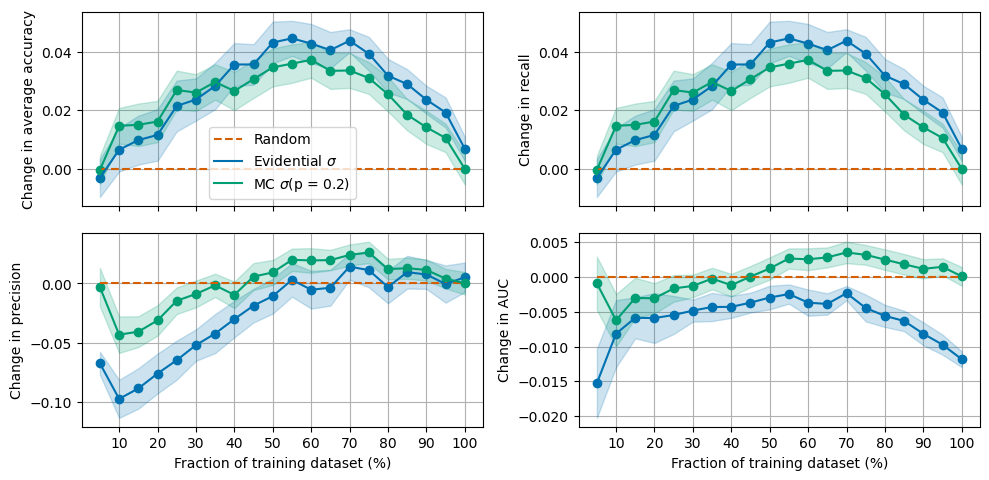

In [302]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5), sharex = "col")#, sharey = "row")

axs[0][0].plot(df_mean_rand.index, [0 for _ in df_mean_rand.index], ls = '--', c = colors[0], zorder = 2)
axs[0][0].scatter(df_mean_evid.index, df_mean_evid[f"{split}_ave_acc"], c = colors[1], zorder = 2)
axs[0][0].plot(df_mean_evid.index, df_mean_evid[f"{split}_ave_acc"], c = colors[1], zorder = 2)
axs[0][0].fill_between(df_mean_evid.index,
                       df_mean_evid[f"{split}_ave_acc"]-df_err_evid[f"{split}_ave_acc"], 
                       df_mean_evid[f"{split}_ave_acc"]+df_err_evid[f"{split}_ave_acc"], color = colors[1], alpha = alpha, zorder = 2)

axs[0][0].scatter(df_mean_rand.index, df_mean_rand[f"{split}_ave_acc"], c = colors[2], zorder = 2)
axs[0][0].plot(df_mean_rand.index, df_mean_rand[f"{split}_ave_acc"], c = colors[2], zorder = 2)
axs[0][0].fill_between(df_mean_rand.index, 
                       df_mean_rand[f"{split}_ave_acc"]-df_err_rand[f"{split}_ave_acc"],
                       df_mean_rand[f"{split}_ave_acc"]+df_err_rand[f"{split}_ave_acc"], color = colors[2], alpha = alpha, zorder = 2)
axs[0][0].grid(True)
    
axs[1][0].plot(df_mean_rand.index, [0 for _ in df_mean_rand.index], ls = '--', c = colors[0], zorder = 2)
axs[1][0].scatter(df_mean_evid.index, df_mean_evid[f"{split}_prec"], c = colors[1], zorder = 2)
axs[1][0].plot(df_mean_evid.index, df_mean_evid[f"{split}_prec"], c = colors[1], zorder = 2)
axs[1][0].fill_between(df_mean_evid.index,
                       df_mean_evid[f"{split}_prec"]-df_err_evid[f"{split}_prec"], 
                       df_mean_evid[f"{split}_prec"]+df_err_evid[f"{split}_prec"], color = colors[1], alpha = alpha, zorder = 2)

axs[1][0].scatter(df_mean_rand.index, df_mean_rand[f"{split}_prec"], c = colors[2], zorder = 2)
axs[1][0].plot(df_mean_rand.index, df_mean_rand[f"{split}_prec"], c = colors[2], zorder = 2)
axs[1][0].fill_between(df_mean_rand.index, 
                       df_mean_rand[f"{split}_prec"]-df_err_rand[f"{split}_prec"],
                       df_mean_rand[f"{split}_prec"]+df_err_rand[f"{split}_prec"], color = colors[2], alpha = alpha, zorder = 2)
axs[1][0].grid(True)

axs[0][1].plot(df_mean_rand.index, [0 for _ in df_mean_rand.index], ls = '--', c = colors[0], zorder = 2)
axs[0][1].scatter(df_mean_evid.index, df_mean_evid[f"{split}_recall"], c = colors[1], zorder = 2)
axs[0][1].plot(df_mean_evid.index, df_mean_evid[f"{split}_recall"], c = colors[1], zorder = 2)
axs[0][1].fill_between(df_mean_evid.index,
                       df_mean_evid[f"{split}_recall"]-df_err_evid[f"{split}_recall"], 
                       df_mean_evid[f"{split}_recall"]+df_err_evid[f"{split}_recall"], color = colors[1], alpha = alpha, zorder = 2)

axs[0][1].scatter(df_mean_rand.index, df_mean_rand[f"{split}_recall"], c = colors[2], zorder = 2)
axs[0][1].plot(df_mean_rand.index, df_mean_rand[f"{split}_recall"], c = colors[2], zorder = 2)
axs[0][1].fill_between(df_mean_rand.index, 
                       df_mean_rand[f"{split}_recall"]-df_err_rand[f"{split}_recall"],
                       df_mean_rand[f"{split}_recall"]+df_err_rand[f"{split}_recall"], color = colors[2], alpha = alpha, zorder = 2)
axs[0][1].grid(True)

axs[1][1].plot(df_mean_rand.index, [0 for _ in df_mean_rand.index], ls = '--', c = colors[0], zorder = 2)
axs[1][1].scatter(df_mean_evid.index, df_mean_evid[f"{split}_auc"], c = colors[1], zorder = 2)
axs[1][1].plot(df_mean_evid.index, df_mean_evid[f"{split}_auc"], c = colors[1], zorder = 2)
axs[1][1].fill_between(df_mean_evid.index,
                       df_mean_evid[f"{split}_auc"]-df_err_evid[f"{split}_auc"], 
                       df_mean_evid[f"{split}_auc"]+df_err_evid[f"{split}_auc"], color = colors[1], alpha = alpha, zorder = 2)

axs[1][1].scatter(df_mean_rand.index, df_mean_rand[f"{split}_auc"], c = colors[2], zorder = 2)
axs[1][1].plot(df_mean_rand.index, df_mean_rand[f"{split}_auc"], c = colors[2], zorder = 2)
axs[1][1].fill_between(df_mean_rand.index, 
                       df_mean_rand[f"{split}_auc"]-df_err_rand[f"{split}_auc"],
                       df_mean_rand[f"{split}_auc"]+df_err_rand[f"{split}_auc"], color = colors[2], alpha = alpha, zorder = 2)
axs[1][1].grid(True)


axs[1][0].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
axs[1][0].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
axs[1][1].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
axs[1][1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

axs[0][0].set_ylabel("Change in average accuracy")
axs[1][0].set_ylabel("Change in precision")

axs[0][1].set_ylabel("Change in recall")
axs[1][1].set_ylabel("Change in AUC")

_ = [axx.set_xlabel("Fraction of training dataset (%)") for axx in axs[1]]

axs[0][0].legend(["Random", r"Evidential $\sigma$", "MC $\sigma$(p = 0.2)"])
plt.tight_layout()